<a href="https://colab.research.google.com/github/deekshajerl16/DS100156/blob/main/week_2_weather_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving weather_data.csv to weather_data (3).csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


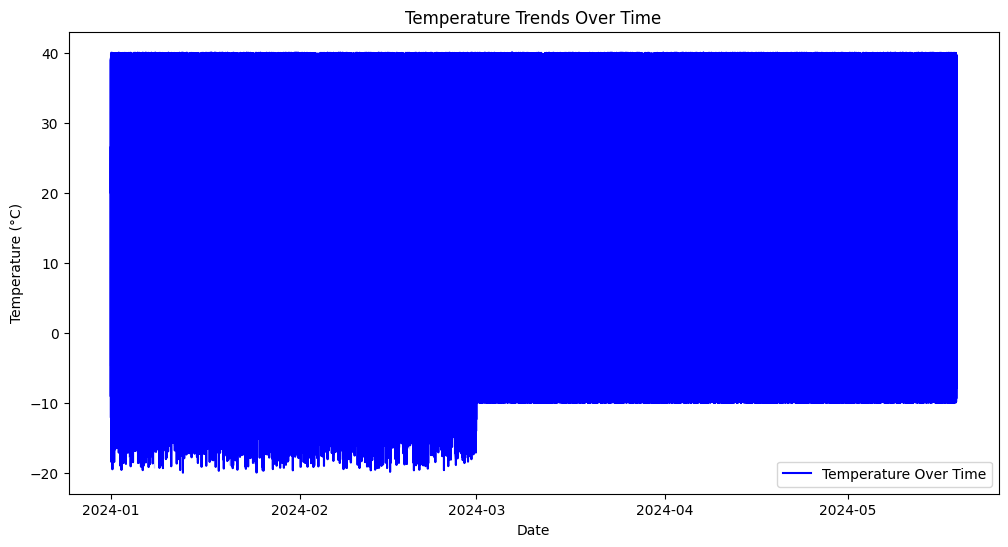

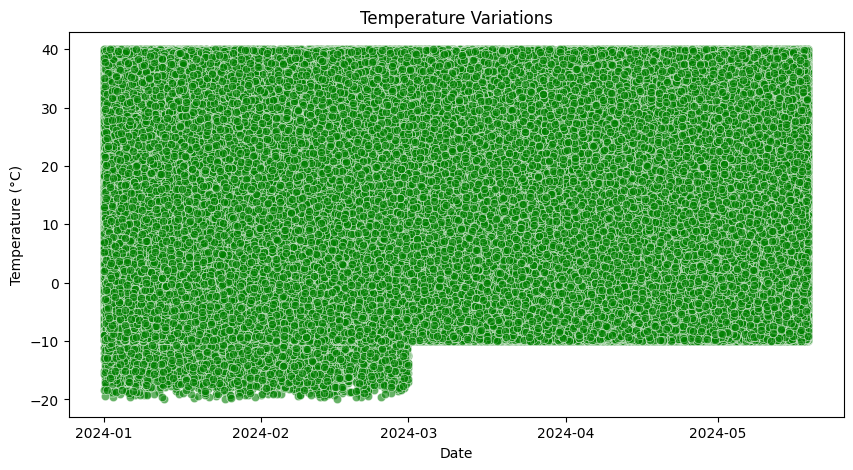

<ipython-input-12-73dbc00d8872>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')


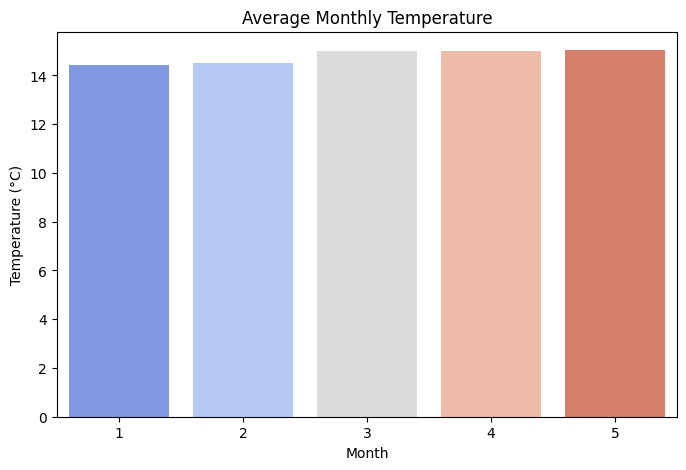

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


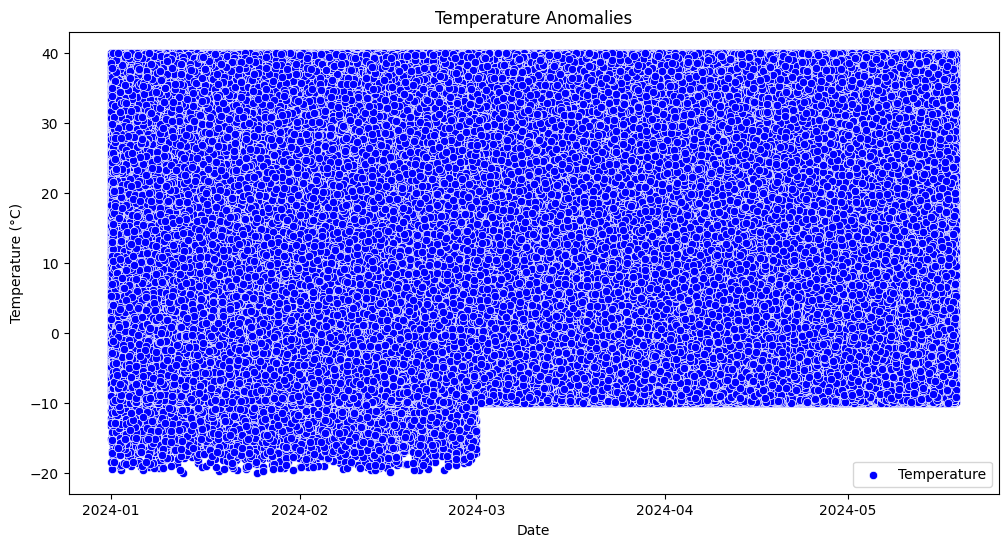

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


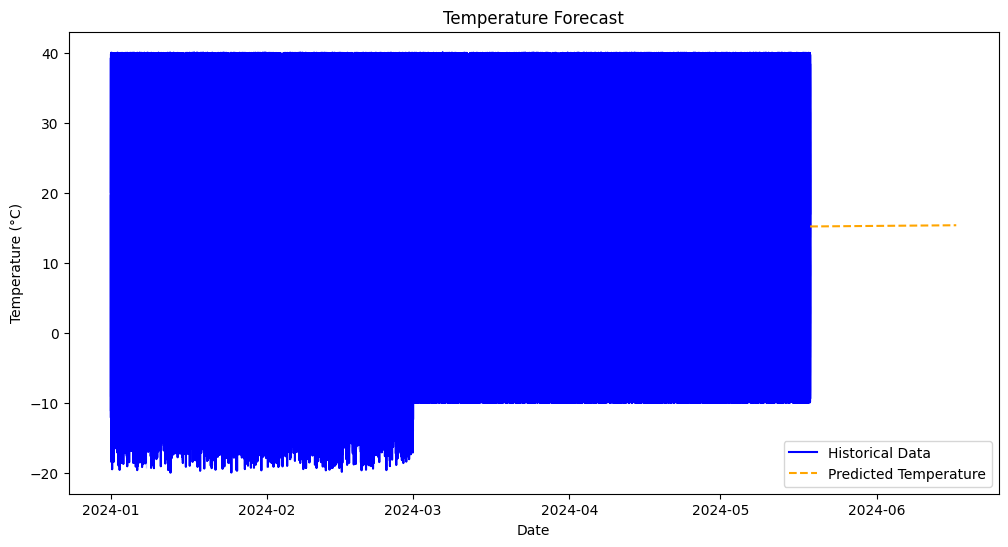

Anomalies detected:
Empty DataFrame
Columns: [Date_Time, Temperature_C]
Index: []
Future Weather Predictions:
             Date_Time  Predicted_Temperature
0  2024-05-18 19:44:10              15.192980
1  2024-05-19 19:44:10              15.198965
2  2024-05-20 19:44:10              15.204950
3  2024-05-21 19:44:10              15.210935
4  2024-05-22 19:44:10              15.216920
5  2024-05-23 19:44:10              15.222905
6  2024-05-24 19:44:10              15.228889
7  2024-05-25 19:44:10              15.234874
8  2024-05-26 19:44:10              15.240859
9  2024-05-27 19:44:10              15.246844
10 2024-05-28 19:44:10              15.252829
11 2024-05-29 19:44:10              15.258813
12 2024-05-30 19:44:10              15.264798
13 2024-05-31 19:44:10              15.270783
14 2024-06-01 19:44:10              15.276768
15 2024-06-02 19:44:10              15.282753
16 2024-06-03 19:44:10              15.288738
17 2024-06-04 19:44:10              15.294722
18 2024-06-05 19

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from google.colab import files

# Upload file in Google Colab
uploaded = files.upload()

# Load weather dataset (Assuming CSV format with specified columns)
df = pd.read_csv(next(iter(uploaded)), parse_dates=['Date_Time'])
def visualize_weather_data(df):
    fig, axes = plt.subplots(4, 2, figsize=(15, 16))

    # Line plots
    sns.lineplot(ax=axes[0, 0], x=df['Date_Time'], y=df['Temperature_C'])
    axes[0, 0].set_title("Temperature Over Time")
    axes[0, 0].set_xlabel("Date")
    axes[0, 0].set_ylabel("Temperature (°C)")

    sns.lineplot(ax=axes[0, 1], x=df['Date_Time'], y=df['Humidity_pct'])
    axes[0, 1].set_title("Humidity Over Time")
    axes[0, 1].set_xlabel("Date")
    axes[0, 1].set_ylabel("Humidity (%)")

    sns.lineplot(ax=axes[1, 0], x=df['Date_Time'], y=df['Precipitation_mm'])
    axes[1, 0].set_title("Precipitation Over Time")
    axes[1, 0].set_xlabel("Date")
    axes[1, 0].set_ylabel("Precipitation (mm)")

    sns.lineplot(ax=axes[1, 1], x=df['Date_Time'], y=df['Wind_Speed_kmh'])
    axes[1, 1].set_title("Wind Speed Over Time")
    axes[1, 1].set_xlabel("Date")
    axes[1, 1].set_ylabel("Wind Speed (km/h)")

    # Scatter plots
    sns.scatterplot(ax=axes[2, 0], x=df['Temperature_C'], y=df['Humidity_pct'])
    axes[2, 0].set_title("Temperature vs Humidity")
    axes[2, 0].set_xlabel("Temperature (°C)")
    axes[2, 0].set_ylabel("Humidity (%)")

    sns.scatterplot(ax=axes[2, 1], x=df['Wind_Speed_kmh'], y=df['Precipitation_mm'])
    axes[2, 1].set_title("Wind Speed vs Precipitation")
    axes[2, 1].set_xlabel("Wind Speed (km/h)")
    axes[2, 1].set_ylabel("Precipitation (mm)")
    plt.tight_layout()
    plt.show()


def visualize_weather_data(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df['Date_Time'], y=df['Temperature_C'], label='Temperature Over Time', color='blue')
    plt.title("Temperature Trends Over Time")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.show()

def scatter_plot(df):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['Date_Time'], y=df['Temperature_C'], alpha=0.6, color='green')
    plt.title("Temperature Variations")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.show()

def bar_chart(df):
    monthly_avg = df.groupby(df['Date_Time'].dt.month)['Temperature_C'].mean()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
    plt.title("Average Monthly Temperature")
    plt.xlabel("Month")
    plt.ylabel("Temperature (°C)")
    plt.show()
def detect_extreme_anomalies(df):
    df['Temperature_zscore'] = zscore(df['Temperature_C'])
    df['Humidity_zscore'] = zscore(df['Humidity_pct'])
    df['Precipitation_zscore'] = zscore(df['Precipitation_mm'])
    df['Wind_Speed_zscore'] = zscore(df['Wind_Speed_kmh'])

    anomalies = df[(np.abs(df[['Temperature_zscore', 'Humidity_zscore', 'Precipitation_zscore', 'Wind_Speed_zscore']]) > 3).any(axis=1)]

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df['Date_Time'], y=df['Temperature_C'], label='Temperature')
    sns.scatterplot(x=anomalies['Date_Time'], y=anomalies['Temperature_C'], color='red', label='Extreme Anomalies')
    plt.title("Extreme Temperature Anomalies")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.show()

    return anomalies

def detect_anomalies(df):
    df['z_score'] = zscore(df['Temperature_C'])
    anomalies = df[np.abs(df['z_score']) > 2.5]  # Threshold for anomalies

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df['Date_Time'], y=df['Temperature_C'], label='Temperature', color='blue')
    sns.scatterplot(x=anomalies['Date_Time'], y=anomalies['Temperature_C'], color='red', label='Anomalies')
    plt.title("Temperature Anomalies")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.show()

    return anomalies

def predict_future_weather(df):
    df['Timestamp'] = df['Date_Time'].map(pd.Timestamp.toordinal)  # Convert dates to numerical values
    model = LinearRegression()
    model.fit(df[['Timestamp']], df['Temperature_C'])

    future_dates = pd.date_range(start=df['Date_Time'].max(), periods=30)
    future_timestamps = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
    future_predictions = model.predict(future_timestamps)

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df['Date_Time'], y=df['Temperature_C'], label='Historical Data', color='blue')
    sns.lineplot(x=future_dates, y=future_predictions, label='Predicted Temperature', linestyle='dashed', color='orange')
    plt.title("Temperature Forecast")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.show()

    return pd.DataFrame({'Date_Time': future_dates, 'Predicted_Temperature': future_predictions})

# Run visualizations
visualize_weather_data(df)
scatter_plot(df)
bar_chart(df)
anomalies = detect_anomalies(df)
future_weather = predict_future_weather(df)

print("Anomalies detected:")
print(anomalies[['Date_Time', 'Temperature_C']])

print("Future Weather Predictions:")
print(future_weather)
